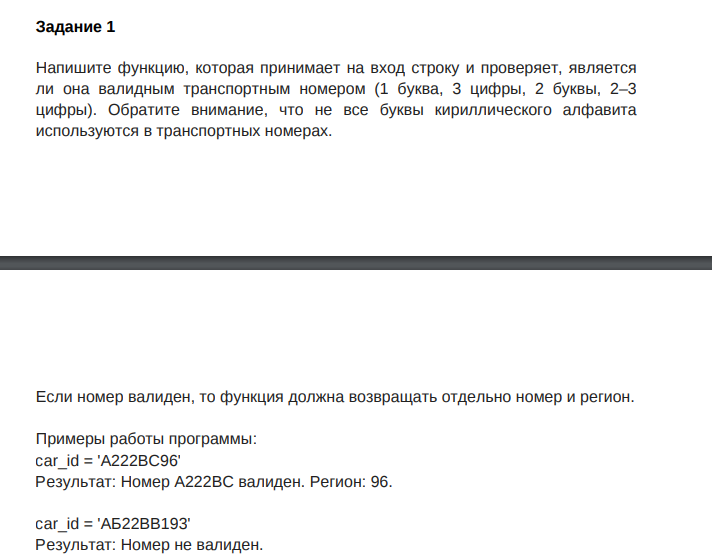

In [1]:
import re

In [105]:
def get_russian_car_number_pattern() -> None:
    gost_cyrilic = ['А', 'В', 'Е', 'К', 'М', 'Н', 'О', 'Р', 'С', 'Т', 'У', 'Х']
    gost_latin = ['A', 'B', 'E', 'K', 'M', 'O','P', 'C', 'T', 'X']
    gcp = ''.join(gost_cyrilic) + ''.join(gost_latin)
    return re.compile(f'^[{gcp}]{{1}}\d{{3}}[{gcp}]{{2}}\d{{2,3}}$'), re.compile(f'^[{gcp}]{{1}}\d{{3}}[{gcp}]{{2}}'), re.compile('\d{2,3}$')

def ru_check_car_number(car_number: str, car_pattern: tuple) -> None:
    full_car_p, non_reg_p, reg_numb_p = car_pattern
    car_number = car_number.upper()
    if re.match(car_pattern[0], car_number):
        print(f'Результат: Номер {re.match(non_reg_p,car_number).group(0) } валиден. Регион: {re.search(reg_numb_p, car_number).group(0)}.')
    else:
        print('Номер не валиден')                          

In [106]:
rcp = get_russian_car_number_pattern()
valid = 'А222BС96'
invalid = 'АБ22ВВ193'

In [107]:
ru_check_car_number(valid, rcp)

Результат: Номер А222BС валиден. Регион: 96.


In [108]:
ru_check_car_number(invalid, rcp)

Номер не валиден


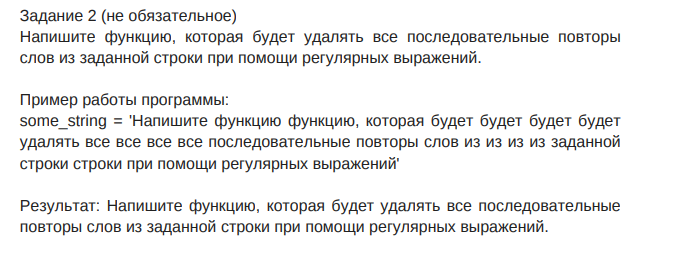

In [254]:
some_string = '''Напишите функцию функцию, которая будет будет будет будет
удалять все все все все последовательные повторы слов из из из из заданной
строки строки при помощи регулярных выражений'''

In [255]:
def remove_duplicates(text: str) -> str:
    text = text.replace('\n', ' ').replace('\t', ' ') 
    pattern = re.compile(r'\s(\S+)(\s+\1){1,}')
    for _ in range(len(re.findall(pattern, text))):
        words_to_rep = re.search(pattern, text).group(0)
        rep = ' ' + words_to_rep.strip().split(' ')[0]
        text = re.sub(words_to_rep, rep, text)
    return text

In [256]:
remove_duplicates(some_string)

'Напишите функцию, которая будет удалять все последовательные повторы слов из заданной строки при помощи регулярных выражений'